In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.impute import KNNImputer

df = pd.read_csv('2014_2016UTASV20161004.csv',encoding='cp932')


questions = ['W1Q17_{}'.format(i) for i in np.arange(1,11,1)]

for i in questions:
    df[i] = df[i].replace(99,np.nan)
    
df.loc[:,questions] = KNNImputer().fit_transform(df[questions])

df.head()

,ID,PREFNAME,CITY,PREFEC,HRDIST,W1Q1,W1Q2,W1Q3,W1Q4,W1Q5_1,...,W2Q26_10,W2Q2FA,W2Q4FA,W2Q7FA,W2Q16FA,W2Q17FA,W2Q22_2FA,W2Q22_3FA,W2Q23FA,W2Q26FA
0,1,北海道,札幌市中央区,1.0,1.0,1,66,66,66,66,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,北海道,札幌市中央区,1.0,1.0,1,66,66,66,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,北海道,札幌市中央区,1.0,1.0,2,3,2,1,10,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,北海道,札幌市中央区,1.0,1.0,1,66,66,66,66,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,北海道新聞
4,9,北海道,札幌市中央区,1.0,1.0,2,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


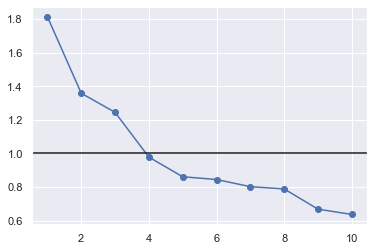

In [5]:
from factor_analyzer import FactorAnalyzer as fa

mod = fa(rotation=None).fit(df[questions])

eigen = mod.get_eigenvalues()[0]

plt.plot(np.arange(1,11),eigen,marker='o')
plt.axhline(1,color='k')

In [6]:
res = fa(rotation='promax',n_factors=3).fit(df[questions])

for i in np.arange(1,4):
    df['factor{}'.format(i)] = res.transform(df[questions].fillna(3))[:,i-1]
    
df[['factor{}'.format(i) for i in np.arange(1,4)]].corr()

,factor1,factor2,factor3
factor1,1.000000,-0.247878,0.219810
factor2,-0.247878,1.000000,-0.049333
factor3,0.219810,-0.049333,1.000000


In [8]:
loadings = pd.DataFrame(res.loadings_,columns=['factor{}'.format(i) for i in np.arange(1,4)])
loadings.to_excel('loadings_electorate_Q17.xlsx')
np.around(loadings,1)

,factor1,factor2,factor3
0,0.4,-0.1,0.1
1,0.6,-0.0,0.0
2,-0.2,-0.0,0.4
3,0.0,0.5,0.0
4,0.2,0.0,0.5
5,-0.3,0.3,0.2
6,0.3,0.1,0.3
7,0.2,-0.3,0.1
8,0.1,0.3,-0.0
9,0.4,0.2,-0.1
